In [3]:
from ananke.models.collection import Collection
import proposal

ImportError: libpython3.10.so.1.0: cannot open shared object file: No such file or directory

In [2]:

from ananke.configurations.collection import MergeConfiguration
from ananke.schemas.event import RecordType
from ananke.configurations.events import EventRedistributionMode
from ananke.configurations.events import (
    RedistributionConfiguration,
    Interval,
    EventRedistributionMode,
)
from ananke.configurations.collection import HDF5StorageConfiguration
import os
import time
import logging
import ananke.models.collection
import importlib
importlib.reload(ananke.models.collection)
from ananke.models.collection import Collection#, LegacyCollection
from ananke.configurations.collection import HDF5StorageConfiguration
logging.getLogger().setLevel(logging.INFO)

from ananke.configurations.collection import (
    HDF5StorageConfiguration,
    MergeConfiguration, MergeContentConfiguration,
)
from ananke.visualisation.detector import get_detector_scatter3ds
import numpy as np
import matplotlib.pyplot as plt
import time

logging.getLogger().setLevel(logging.INFO)

import cProfile
import pstats

In [2]:
configuration = MergeConfiguration.parse_obj(
    {
        'in_collections': [
            {
                'type': 'hdf5',
                'data_path':'data/HexCascadeBenchMark.h5',
                'read_only':'False',
            },
            {
                'type': 'hdf5',
                'data_path': 'data/Hex_electrical_noise_10_BM.h5',
                'read_only':'False',
            },
            {
                'type': 'hdf5',
                'data_path': 'data/HexBioluminescenceBenchMark.h5',
                'read_only':'False',
            },
        ],
        'out_collection': {
                'type': 'hdf5',
                'data_path': 'data/4.h5',
                'read_only':'False',
        },
        'content': [
            {
                'primary_type': RecordType.CASCADE.value,
                'secondary_types': [RecordType.ELECTRICAL.value,RecordType.BIOLUMINESCENCE],
                'number_of_records': 10,
                'interval': {
                    'start': 0,
                    'end': 1000,
                }
            },
        ],
        'redistribution': {
            'interval': {
                'start': 0,
                'end': 1000
            },
            'mode': EventRedistributionMode.CONTAINS_EVENT
        }
           
    }
)

print(configuration)

in_collections=[HDF5StorageConfiguration(type=<StorageTypes.HDF5: 'hdf5'>, read_only=False, batch_size=100, data_path='data/HexCascadeBenchMark.h5', complevel=3, complib='lzo', optlevel=6), HDF5StorageConfiguration(type=<StorageTypes.HDF5: 'hdf5'>, read_only=False, batch_size=100, data_path='data/Hex_electrical_noise_10_BM.h5', complevel=3, complib='lzo', optlevel=6), HDF5StorageConfiguration(type=<StorageTypes.HDF5: 'hdf5'>, read_only=False, batch_size=100, data_path='data/HexBioluminescenceBenchMark.h5', complevel=3, complib='lzo', optlevel=6)] tmp_collection=HDF5StorageConfiguration(type=<StorageTypes.HDF5: 'hdf5'>, read_only=False, batch_size=100, data_path='/u/arego/.local/lib/python3.10/site-packages/ananke/configurations/../../_tmp_65d9faa7-1982-4643-9fd2-54c779e5512cdata.h5', complevel=3, complib='lzo', optlevel=6) out_collection=HDF5StorageConfiguration(type=<StorageTypes.HDF5: 'hdf5'>, read_only=False, batch_size=100, data_path='data/4.h5', complevel=3, complib='lzo', optleve

In [1]:
import sys
import time
import traceback
#from joblib.externals.loky import set_loky_pickler
#from joblib import parallel_config
from joblib import Parallel, delayed
#from joblib import wrap_non_picklable_objects

In [8]:
def func_async(i, *args):
    return 2 * i


print(Parallel(n_jobs=8)(delayed(func_async)(_) for _ in range(10)))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [5]:
def func_async(i, *args):
    return 2 * i


# We have to pass an extra argument with a large list (or another large python
# object).
large_list = list(range(1000000))

t_start = time.time()
Parallel(n_jobs=2)(delayed(func_async)(21, large_list) for _ in range(1))
print("With loky backend and cloudpickle serialization: {:.3f}s"
      .format(time.time() - t_start))

With loky backend and cloudpickle serialization: 0.072s


In [2]:
config=HDF5StorageConfiguration(data_path='data/HexRealTracks.h5',read_only=False)
C1=Collection(config)

In [3]:
C1.open()

In [4]:
x=C1.storage.store

In [5]:
type(x)

pandas.io.pytables.HDFStore

In [1]:
def func1(x):
    print("hi")
    return x**2

In [2]:
from joblib import Parallel, delayed

In [4]:
Parallel(n_jobs=8)(delayed(func1)(x) for x in range(10))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi


In [1]:
import numpy as np

In [13]:
import matplotlib.pyplot as plt

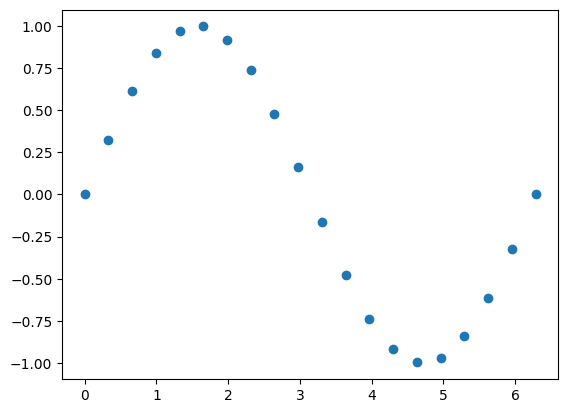

In [36]:
x=np.linspace(0,2*np.pi,20)
plt.scatter(x,np.sin(x))
plt.show()